In [1]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
rc = {"font.family" : "serif", 
      "mathtext.fontset" : "stix"}
plt.rcParams.update(rc)
plt.rcParams["font.serif"] = ["Times New Roman"] + plt.rcParams["font.serif"]

In [3]:
x = y = np.arange(-1, 1+0.01, 0.01)
X, Y = np.meshgrid(x, y)

In [4]:
delta1 = 0.01
delta2 = 0.01
traj_length = 50000

def f1_fn(x, y):
    return 1*x*y
def f2_fn(x, y):
    return (1*x*y + 1.0/5*x**2)**2

def d1f1_fn(x, y):
    return 1*y
def d2f2_fn(x, y):
    return 2*(1*x*y + 1.0/5*x**2)*1*x 

def d22f2_fn(x, y):
    return 2*(1*x)**2
def d12f2_fn(x, y):
    return 4*(1)**2*x*y + 6*(1.0/5)*1*x**2
def d2f1_fn(x, y):
    return 1*x

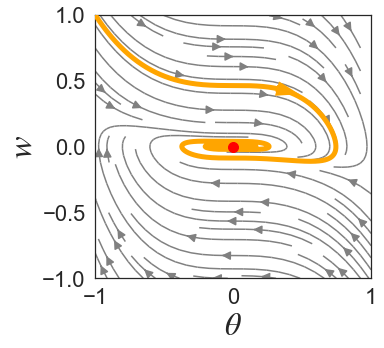

In [5]:
r_sim = []
error_sim = []

x_curr = -1.0
y_curr = 1.0
x_traj = [x_curr]
y_traj = [y_curr]
for t in range(1, traj_length):
    x_new = x_curr + delta1 * d1f1_fn(x_curr, y_curr)
    y_new = y_curr - delta2 * d2f2_fn(x_curr, y_curr)
    x_traj.append(x_new)
    y_traj.append(y_new)
    r_sim.append(-1.0/5*x_new**2)
    error_sim.append(la.norm(np.array([x_new,y_new])))
    x_curr = x_new
    y_curr = y_new

sns.set(style="white")
plt.figure(figsize=(5.5, 5))
plt.streamplot(x, y, delta1*d1f1_fn(X, Y), -delta2*d2f2_fn(X, Y), zorder=2, color='grey', density=[0.8,0.8], arrowsize=1.75)
plt.plot(x_traj, y_traj, color='orange', lw=5, zorder=3)
plt.arrow(x_traj[250], y_traj[250], x_traj[251] - x_traj[250], y_traj[251] - y_traj[250], shape='full', color='orange', lw=7, length_includes_head=False, head_width=.04, zorder=3)
plt.scatter(0, 0, color='red', s=100, zorder=4)
plt.xlabel(r"$\theta$", fontsize=32)
plt.ylabel(r"$w$", fontsize=34)
plt.tick_params(labelsize=22)
plt.ylim(-1, 1)
plt.tight_layout()
plt.show()

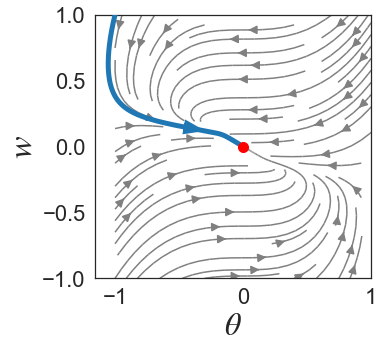

In [6]:
r_stac = []
error_stac = []

x_curr = -1.0
y_curr = 1.0
reg = 0
x_traj = [x_curr]
y_traj = [y_curr]
for t in range(1, traj_length):
    x_new = x_curr + delta1 * (d1f1_fn(x_curr, y_curr) - d12f2_fn(x_curr, y_curr) / (d22f2_fn(x_curr, y_curr)+reg) * d2f1_fn(x_curr, y_curr))
    y_new = y_curr - delta2 * d2f2_fn(x_curr, y_curr)
    x_traj.append(x_new)
    y_traj.append(y_new)
    r_stac.append(-1.0/5*x_new**2)
    error_stac.append(la.norm(np.array([x_new,y_new])))
    x_curr = x_new
    y_curr = y_new

sns.set(style="white")
plt.figure(figsize=(5.5, 5))
plt.streamplot(x, y, delta1*(d1f1_fn(X, Y) - d12f2_fn(X, Y) / (d22f2_fn(X, Y)+reg) * d2f1_fn(X, Y)), -delta2*d2f2_fn(X, Y), zorder=2, color='grey', density=[0.8,0.8], arrowsize=1.75)
plt.plot(x_traj, y_traj, color='tab:blue', lw=5, zorder=3)
plt.arrow(x_traj[350], y_traj[350], x_traj[351] - x_traj[350], y_traj[351] - y_traj[350], shape='full', color='tab:blue', lw=7, length_includes_head=False, head_width=.04, zorder=3)
plt.scatter(0, 0, color='red', s=100, zorder=4)
plt.xlabel(r"$\theta$", fontsize=32)
plt.ylabel(r"$w$", fontsize=34)
plt.tick_params(labelsize=22)
plt.ylim(-1, 1)
plt.tight_layout()
plt.show()

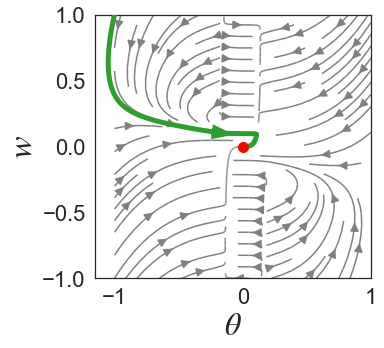

In [7]:
r_stac_reg = []
error_stac_reg = []

x_curr = -1.0
y_curr = 1.0
reg = 0.04
x_traj = [x_curr]
y_traj = [y_curr]
for t in range(1, traj_length):
    x_new = x_curr + delta1 * (d1f1_fn(x_curr, y_curr) - d12f2_fn(x_curr, y_curr) / (d22f2_fn(x_curr, y_curr)+reg) * d2f1_fn(x_curr, y_curr))
    y_new = y_curr - delta2 * d2f2_fn(x_curr, y_curr)
    x_traj.append(x_new)
    y_traj.append(y_new)
    r_stac_reg.append(-1.0/5*x_new**2)
    error_stac_reg.append(la.norm(np.array([x_new,y_new])))
    x_curr = x_new
    y_curr = y_new

sns.set(style="white")
plt.figure(figsize=(5.5, 5))
plt.streamplot(x, y, delta1*(d1f1_fn(X, Y) - d12f2_fn(X, Y) / (d22f2_fn(X, Y)+reg) * d2f1_fn(X, Y)), -delta2*d2f2_fn(X, Y), zorder=2, color='grey', density=[0.8,0.8], arrowsize=1.75)
plt.plot(x_traj, y_traj, color='tab:green', lw=5, zorder=3)
plt.arrow(x_traj[650], y_traj[650], x_traj[651] - x_traj[650], y_traj[651] - y_traj[650], shape='full', color='tab:green', lw=7, length_includes_head=False, head_width=.04, zorder=3)
plt.scatter(0, 0, color='red', s=100, zorder=4)
plt.xlabel(r"$\theta$", fontsize=32)
plt.ylabel(r"$w$", fontsize=34)
plt.tick_params(labelsize=22)
plt.ylim(-1, 1)
plt.tight_layout()
plt.show()

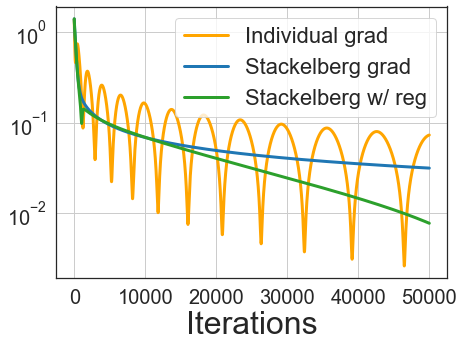

In [8]:
plt.figure(figsize=(7,5))
plt.yscale('log')
plt.grid('True')
plt.plot(error_sim, color='orange', linewidth=3, label='Individual grad')
plt.plot(error_stac, color='tab:blue', linewidth=3, label='Stackelberg grad')
plt.plot(error_stac_reg, color='tab:green', linewidth=3, label='Stackelberg w/ reg')
plt.xlabel("Iterations", fontsize=32)
plt.legend(loc='best', fontsize=22)
plt.tick_params(labelsize=20)
plt.show()

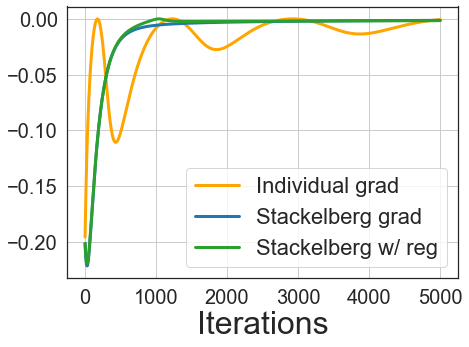

In [9]:
plt.figure(figsize=(7,5))
plt.grid('True')
plt.plot(r_sim[:5000], color='orange', linewidth=3, label='Individual grad')
plt.plot(r_stac[:5000], color='tab:blue', linewidth=3, label='Stackelberg grad')
plt.plot(r_stac_reg[:5000], color='tab:green', linewidth=3, label='Stackelberg w/ reg')
plt.xlabel("Iterations", fontsize=32)
plt.legend(loc='lower right', fontsize=22)
plt.tick_params(labelsize=20)
plt.show()

In [10]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.autograd as autograd
from torch.distributions.normal import Normal

In [11]:
class actor(nn.Module):
    def __init__(self, mu=-1.0, std=1.0):
        super().__init__()
        self.mu = nn.Parameter(torch.tensor([mu]))
        self.std = nn.Parameter(torch.tensor([std]))
    
    def forward(self):
        pi_distribution = Normal(self.mu, self.std)
        pi_action = pi_distribution.rsample()
        logp_pi = pi_distribution.log_prob(pi_action).sum(axis=-1)
        logp_pi -= (2*(np.log(2) - pi_action - F.softplus(-2*pi_action))).sum()
        pi_action = torch.tanh(pi_action)
        return pi_action, logp_pi

In [12]:
class critic(nn.Module):
    def __init__(self, w=1.0):
        super().__init__()
        self.w = nn.Parameter(torch.tensor([w]))

    def forward(self, act):
        q = torch.matmul(act, self.w)
        return q

In [13]:
eta = 0.2
lr = 0.01
pi = actor()
Q = critic()
pi_params = list(pi.parameters())
q_params = list(Q.parameters())

def compute_loss_q(a, r):
    loss_q = ((Q(a) - r)**2).mean()
    return loss_q

def compute_loss_pi(a, logp_a):
    q_a = Q(a)
    loss_pi = (eta * logp_a - q_a).mean()
    return loss_pi

def gd_optimizer(params, grad, lr):
    for p, q in zip(params, grad):
        p.data.add_(-lr * q)

In [14]:
pi = actor()
Q = critic()
pi_params = list(pi.parameters())
q_params = list(Q.parameters())

mu_sim_list = []
std_sim_list = []
w_sim_list = []
r_sim = []
error_sim = []

for i in range(2000):
    a_list = []
    logp_a_list = []
    for k in range(3):
        a, logp_a = pi()
        a_list.append(a)
        logp_a_list.append(logp_a)
    a_stack = torch.stack(a_list)
    logp_a_stack = torch.stack(logp_a_list)
    
    loss_q = compute_loss_q(a_stack, -a_stack**2)
    loss_pi = compute_loss_pi(a_stack, logp_a_stack)
    
    grad_q = autograd.grad(loss_q, q_params)
    grad_pi = autograd.grad(loss_pi, pi_params)
    gd_optimizer(q_params, grad_q, lr)
    gd_optimizer(pi_params, grad_pi, lr)
    
    mu_sim_list.append(pi.mu.data.numpy().item())
    std_sim_list.append(pi.std.data.numpy().item())
    w_sim_list.append(Q.w.data.numpy().item())
    r_sim.append(-1.0/5*pi.mu.data.numpy().item()**2)
    error_sim.append(la.norm(np.array([pi.mu.data.numpy().item(), Q.w.data.numpy().item()])))

In [15]:
x1 = y = np.arange(-1, 1+0.01, 0.01)
x2 = 1.0
X, Y = np.meshgrid(x1, y)

grad_mu_mat_sim = np.zeros(X.shape)
grad_w_mat_sim = np.zeros(X.shape)

for i in range(len(x1)):
    for j in range(len(x1)):
        grad_mu = []
        grad_w = []
        pi = actor(mu=X[i,j])
        Q = critic(w=Y[i,j])
        pi_params = list(pi.parameters())
        q_params = list(Q.parameters())

        a_list = []
        logp_a_list = []
        for k in range(3):
            a, logp_a = pi()
            a_list.append(a)
            logp_a_list.append(logp_a)
        a_stack = torch.stack(a_list)
        logp_a_stack = torch.stack(logp_a_list)
        
        loss_q = compute_loss_q(a_stack, -a_stack**2)
        loss_pi = compute_loss_pi(a_stack, logp_a_stack)
        grad_q = autograd.grad(loss_q, q_params)
        grad_pi = autograd.grad(loss_pi, pi_params)
        grad_mu_mat_sim[i,j] = grad_pi[0].numpy().item()
        grad_w_mat_sim[i,j] = grad_q[0].numpy().item()

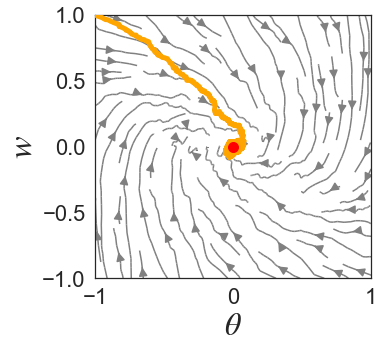

In [16]:
sns.set(style="white")
plt.figure(figsize=(5.5, 5))
plt.streamplot(x1, y, -grad_mu_mat_sim, -grad_w_mat_sim, zorder=2, color='grey', density=[0.8,0.8], arrowsize=1.75)
plt.plot(mu_sim_list, w_sim_list, color='orange', lw=5, zorder=3)
plt.scatter(0, 0, color='red', s=100, zorder=4)
plt.xlabel(r"$\theta$", fontsize=32)
plt.ylabel(r"$w$", fontsize=34)
plt.tick_params(labelsize=22)
plt.tight_layout()
plt.show()

In [17]:
reg = 0

pi = actor()
Q = critic()
pi_params = list(pi.parameters())
q_params = list(Q.parameters())

mu_stac_list = []
std_stac_list = []
w_stac_list = []
r_stac = []
error_stac = []

for i in range(2000):
    a_list = []
    logp_a_list = []
    for k in range(3):
        a, logp_a = pi()
        a_list.append(a)
        logp_a_list.append(logp_a)
    a_stack = torch.stack(a_list)
    logp_a_stack = torch.stack(logp_a_list)
    
    loss_q = compute_loss_q(a_stack, -a_stack**2)
    loss_pi = compute_loss_pi(a_stack, logp_a_stack)
    
    grad_q = autograd.grad(loss_q, q_params, create_graph=True)
    gd_optimizer(q_params, grad_q, lr)
    grad_pi = autograd.grad(loss_pi, pi_params, create_graph=True)
    D2f1 = autograd.grad(loss_pi, q_params, create_graph=True)
    D22f2 = autograd.grad(grad_q, q_params, create_graph=True)
    D12f2 = autograd.grad(grad_q, pi_params, create_graph=True)
    stac_grad = [g / (D22f2[0]+reg) * D2f1[0] for g in D12f2]
    gd_optimizer(pi_params, [g1-g2 for g1, g2 in zip (grad_pi, stac_grad)], lr)
    
    mu_stac_list.append(pi.mu.data.numpy().item())
    std_stac_list.append(pi.std.data.numpy().item())
    w_stac_list.append(Q.w.data.numpy().item())
    r_stac.append(-1.0/5*pi.mu.data.numpy().item()**2)
    error_stac.append(la.norm(np.array([pi.mu.data.numpy().item(), Q.w.data.numpy().item()])))

In [18]:
x1 = y = np.arange(-1, 1+0.01, 0.01)
x2 = 1.0
X, Y = np.meshgrid(x1, y)

grad_mu_mat_stac = np.zeros(X.shape)
grad_w_mat_stac = np.zeros(X.shape)

for i in range(len(x1)):
    for j in range(len(x1)):
        grad_mu = []
        grad_w = []
        pi = actor(mu=X[i,j])
        Q = critic(w=Y[i,j])
        pi_params = list(pi.parameters())
        q_params = list(Q.parameters())

        a_list = []
        logp_a_list = []
        for k in range(3):
            a, logp_a = pi()
            a_list.append(a)
            logp_a_list.append(logp_a)
        a_stack = torch.stack(a_list)
        logp_a_stack = torch.stack(logp_a_list)
        
        loss_q = compute_loss_q(a_stack, -a_stack**2)
        loss_pi = compute_loss_pi(a_stack, logp_a_stack)
        grad_q = autograd.grad(loss_q, q_params, create_graph=True)
        grad_pi = autograd.grad(loss_pi, pi_params, create_graph=True)
        D2f1 = autograd.grad(loss_pi, q_params, create_graph=True)
        D22f2 = autograd.grad(grad_q, q_params, create_graph=True)
        D12f2 = autograd.grad(grad_q, pi_params, create_graph=True)
        stac_grad = [g / (D22f2[0]+reg) * D2f1[0] for g in D12f2]
        
        grad_mu_mat_stac[i,j] = (grad_pi[0]-stac_grad[0]).detach().numpy().item()
        grad_w_mat_stac[i,j] = grad_q[0].detach().numpy().item()

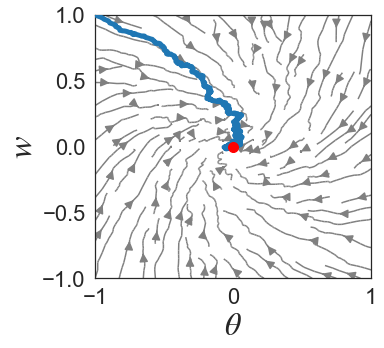

In [19]:
sns.set(style="white")
plt.figure(figsize=(5.5, 5))
plt.streamplot(x1, y, -grad_mu_mat_stac, -grad_w_mat_stac, zorder=2, color='grey', density=[0.8,0.8], arrowsize=1.75)
plt.plot(mu_stac_list, w_stac_list, color='tab:blue', lw=5, zorder=3)
plt.scatter(0, 0, color='red', s=100, zorder=4)
plt.xlabel(r"$\theta$", fontsize=32)
plt.ylabel(r"$w$", fontsize=34)
plt.tick_params(labelsize=22)
plt.tight_layout()
plt.show()

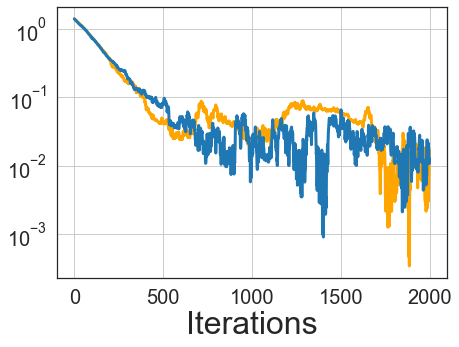

In [20]:
plt.figure(figsize=(7,5))
plt.yscale('log')
plt.grid('True')
plt.plot(error_sim, color='orange', linewidth=3, label='GDA')
plt.plot(error_stac, color='tab:blue', linewidth=3, label='Stack w/o reg')
plt.xlabel("Iterations", fontsize=32)
plt.tick_params(labelsize=20)
plt.show()

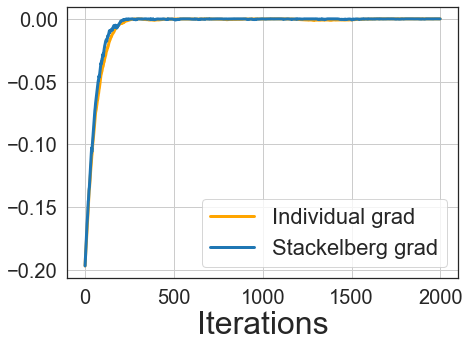

In [21]:
plt.figure(figsize=(7,5))
plt.grid('True')
plt.plot(r_sim, color='orange', linewidth=3, label='Individual grad')
plt.plot(r_stac, color='tab:blue', linewidth=3, label='Stackelberg grad')
plt.xlabel("Iterations", fontsize=32)
plt.legend(loc='best', fontsize=22)
plt.tick_params(labelsize=20)
plt.show()